In [24]:
from qiskit import *
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
%matplotlib inline

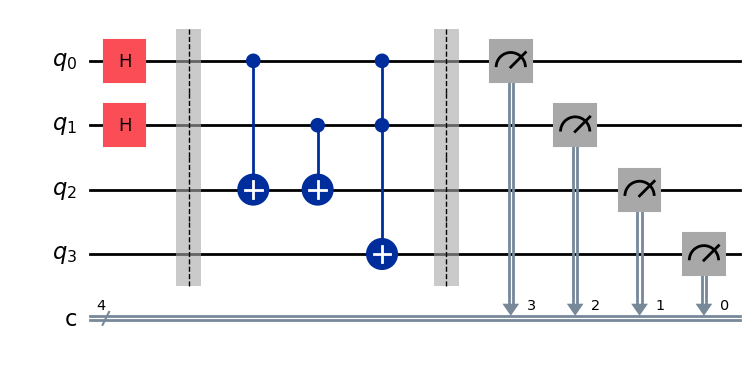

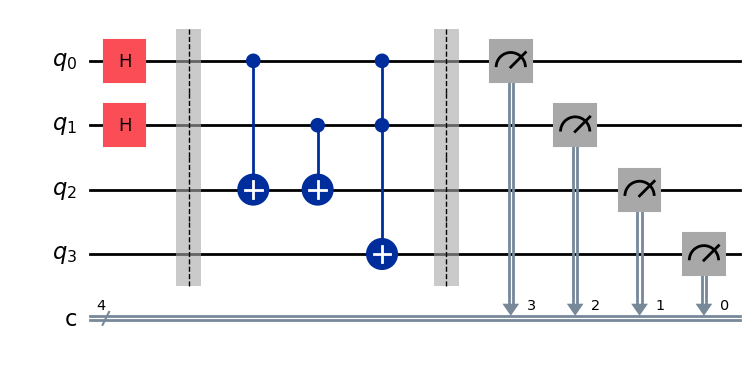

In [25]:
circuit = QuantumCircuit(4, 4)
circuit.h(0) # initalize input A
circuit.h(1) # initalize input B
circuit.barrier()

circuit.cx(0, 2)
circuit.cx(1, 2)
circuit.ccx(0, 1, 3)

circuit.barrier()
circuit.measure(0, 3)
circuit.measure(1, 2) 
circuit.measure(2, 1) # measure SUM
circuit.measure(3, 0) # measure CARRY-OUT
circuit.draw(output='mpl')

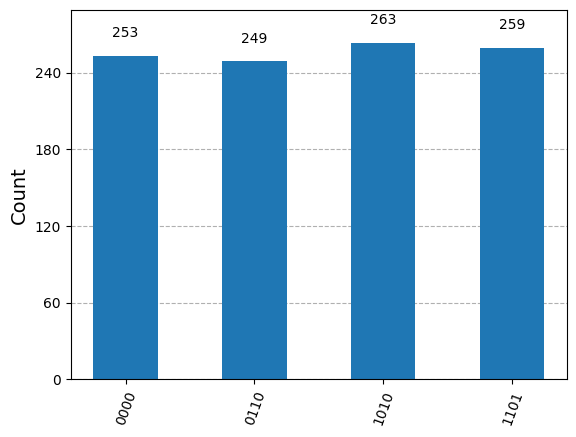

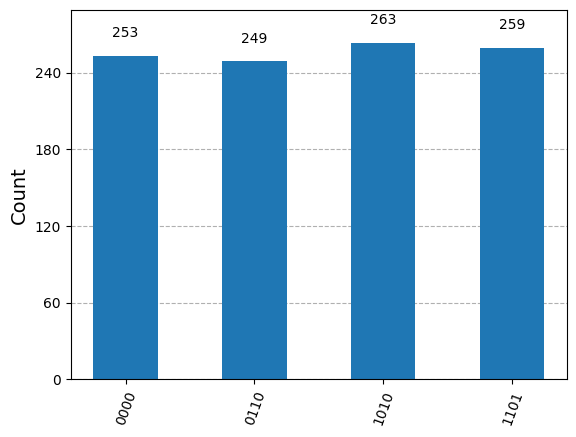

In [26]:


# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
plot_histogram(result.get_counts())